CST 395 -CSE Neural Networks and Deep Learning Assignment 1<br>
Submiited by: Rajul P E<br>
              S5 CSE<br>
              Roll no: 52 <br>
              TVE19CS054<br>


Import Libraries

First, we need to prepare our work environment and import the necessary libraries. Here we use the end-to-end open source Machine Learning framework, maintained by Google, which is Tensorflow.

In [64]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

Load MNIST Handwritten Digit Dataset

The required dataset is avaliable within the Tensorflow datasets. 


In [19]:
# Load the dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Number of Training samples: ' + str(trainX.shape[0]))
print('Number of Tesing samples: ' + str(testX.shape[0]))

Number of Training samples: 60000
Number of Tesing samples: 10000


Display Dataset

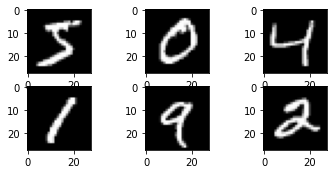

In [20]:
# plot first few images
for i in range(6):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

### Reshape Dataset

we can load the images and reshape the data arrays to have a single color channel.

In [21]:
(trainX, trainY), (testX, testY) = mnist.load_data()

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

There are ten output classes for this task(i.e from 1 to 10). Oe-hot encode the output target class variables 

In [22]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [23]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# Perform normalization
trainX = train_norm / 255.0
testX = test_norm / 255.0

Define the First Model Architecture

In [29]:
def model_1():
	model = Sequential()
	model.add(Flatten(input_shape=(28, 28)))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(10, activation='softmax'))
	opt = Adam(learning_rate=0.01) # Define an optimizer function
 	# Compile model
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

Define a function to train the model


In [37]:
# evaluate a model using k-fold cross-validation
def evaluate_model(modelX):
    scores = list()
    # define model
    model = modelX()
    print(model.summary())
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('Validation Accuarcy %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    return scores, history

### Define a function to plot the Accuracy VS Epoch graphs

In [46]:
# summarize history for accuracy
def plot(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

Load and train the first model.

In [42]:
scores, history = evaluate_model(model_1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2537 - accuracy: 0.9248 - val_loss: 0.1763 - val_accuracy: 0.9478
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1660 - accuracy: 0.9530 - val_loss: 0.1791 - val_accuracy: 0.9538
Epoch 3/10
1875/1875 

#### Plot Accuracy vs Epoch chart for Model 1

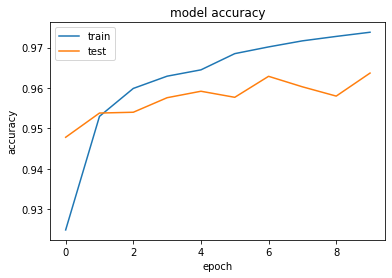

In [47]:
plot(history[0])

Define the Second Model Architecture

In [61]:
def model_2():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Define an optimizer (here Adam)
    opt = Adam(learning_rate=0.01)
    # Compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Load and train the second model.

In [62]:
scores, history = evaluate_model(model_2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 1024)              803840    
                                                                 
 dense_41 (Dense)            (None, 512)               524800    
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dense_43 (Dense)            (None, 128)               32896     
                                                                 
 dense_44 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,494,154
Trainable params: 1,494,154
N

#### Plot Accuracy vs Epoch chart for Model 1

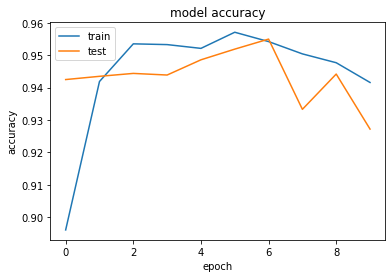

In [63]:
plot(history[0])